# **1º ETAPA -** Inclusão dos Dados e verificação


In [ ]:
# TODOS OS IMPORT QUE PRECISAMOS UTILIZAR

import pandas as pd
import seaborn as sb
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [ ]:
# UPLOAD DA BASE DE DADOS

from google.colab import files
uploaded = files.upload()
df = pd.read_excel('FEMINICIDIO.xlsx')

In [ ]:
# VERIFICAR QUANTIDADE DE COLUNAS E LINHAS NA BASE DE DADOS

df.shape

(1217, 57)

In [ ]:
# EXCLUINDO AS COLUNAS QUE NÃO VAMOS UTILIZAR NA ANALISE

df.drop(['NUMERO_BOLETIM_PRINCIPAL', 'RG', 'EXAME', 'GRAUINSTRUCAO', 'LOGRADOURO',
                 'NUMERO','LATITUDE','LONGITUDE','NOMEPESSOA','PARENTESCO',
                 'PLACA_VEICULO','UF_VEICULO','CIDADE_VEICULO','DESCR_COR_VEICULO','DESCR_MARCA_VEICULO',
                 'ANO_FABRICACAO','ANO_MODELO','DESCR_TIPO_VEICULO','QUANT_CELULAR', 'MARCA_CELULAR'],axis=1,inplace=True)

In [ ]:
# REMOVE REGISTROS DUPLICADOS

df.drop_duplicates()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,BAIRRO,CIDADE,UF,DESCRICAOLOCAL,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,TIPOPESSOA,VITIMAFATAL,RG_UF,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,RELACIONAMENTO
0,2017,1739,1739/2017,2017-12-01 21:44:15,2017-12-01 23:20:38,2017-12-01,19:30:00,A NOITE,2017-12-01,2017-12-01 21:44:15,Conhecida,Não,CACHOERINHA,CAJATI,SP,Residência,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.CAJATI,DEL.POL.CAJATI,Título I - Pessoa (arts. 121 a 154),"Homicídio qualificado (art. 121, §2o.)",VI-Feminicídio-contra a mulher por razões da c...,Consumado,Vítima,Sim,SP,PARIQUERA-ACU -SP,BRASILEIRA,Feminino,1974-04-10,43.0,Casado,NaN,Parda,"Homicídio qualificado (art. 121, §2o.)",Vítima,UNIAO ESTAVEL
1,2017,1024,1024/2017,2017-12-04 10:45:07,2017-12-04 14:01:28,2017-12-04,08:08:00,PELA MANHÃ,2017-12-04,2017-12-04 10:45:07,Conhecida,Sim,AREA RURAL,PILAR DO SUL,SP,Residência,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.PILAR DO SUL,DEL.POL.PILAR DO SUL,Título I - Pessoa (arts. 121 a 154),"Homicídio qualificado (art. 121, §2o.)",II - por motivo fútil,Consumado,Vítima,Sim,SP,ITAPETININGA -SP,BRASILEIRA,Feminino,1989-08-14,28.0,Solteiro,NaN,Branca,"Homicídio qualificado (art. 121, §2o.)",Vítima,NaN
2,2017,1024,1024/2017,2017-12-04 10:45:07,2017-12-04 14:01:28,2017-12-04,08:08:00,PELA MANHÃ,2017-12-04,2017-12-04 10:45:07,Conhecida,Sim,AREA RURAL,PILAR DO SUL,SP,Residência,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.PILAR DO SUL,DEL.POL.PILAR DO SUL,Título I - Pessoa (arts. 121 a 154),"Homicídio qualificado (art. 121, §2o.)",II - por motivo fútil,Consumado,Vítima,Sim,SP,PIEDADE -SP,BRASILEIRA,Feminino,1972-02-12,45.0,Casado,NAO INFORMADA,Branca,"Homicídio qualificado (art. 121, §2o.)",Vítima,NaN
3,2017,1024,1024/2017,2017-12-04 10:45:07,2017-12-04 14:01:28,2017-12-04,08:08:00,PELA MANHÃ,2017-12-04,2017-12-04 10:45:07,Conhecida,Sim,AREA RURAL,PILAR DO SUL,SP,Residência,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.PILAR DO SUL,DEL.POL.PILAR DO SUL,Título I - Pessoa (arts. 121 a 154),"Homicídio qualificado (art. 121, §2o.)",VI-Feminicídio-contra a mulher por razões da c...,Consumado,Vítima,Sim,SP,ITAPETININGA -SP,BRASILEIRA,Feminino,1989-08-14,28.0,Solteiro,NaN,Branca,"Homicídio qualificado (art. 121, §2o.)",Vítima,NaN
4,2017,1024,1024/2017,2017-12-04 10:45:07,2017-12-04 14:01:28,2017-12-04,08:08:00,PELA MANHÃ,2017-12-04,2017-12-04 10:45:07,Conhecida,Sim,AREA RURAL,PILAR DO SUL,SP,Residência,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.PILAR DO SUL,DEL.POL.PILAR DO SUL,Título I - Pessoa (arts. 121 a 154),"Homicídio qualificado (art. 121, §2o.)",VI-Feminicídio-contra a mulher por razões da c...,Consumado,Vítima,Sim,SP,PIEDADE -SP,BRASILEIRA,Feminino,1972-02-12,45.0,Casado,NAO INFORMADA,Branca,"Homicídio qualificado (art. 121, §2o.)",Vítima,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,2020,3714,3714/2020,2020-09-27 23:02:51,2020-09-28 02:05:22,2020-09-27,21:45:00,A NOITE,2020-09-27,2020-09-27 23:02:51,Conhecida,Sim,AGUA RASA,S.PAULO,SP,Residência,BO PARA FLAGRANTE,56º D.P. VILA ALPINA,29º D.P. VILA PRUDENTE,Suicídio,Suicídio tentado,NaN,Tentado,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1213,2020,3714,3714/2020,2020-09-27 23:02:51,2020-09-28 02:05:22,2020-09-27,21:45:00,A NOITE,2020-09-27,2020-09-27 23:02:51,Conhecida,Sim,AGUA RASA,S.PAULO,SP,Residência,BO PARA FLAGRANTE,56º D.P. VILA ALPINA,29º D.P. VILA PRUDENTE,Título I - Pessoa (arts. 121 a 154),"Homicídio qualificado (art. 121, §2o.)",VI-Feminicídio-contra a mulher por razões da c...,Consumado,Vítima,Sim,SP,PENAPOLIS -SP,BRASILEIRA,Feminino,1951-10-06,68.0,Casado,NaN,Branca,"Homicídio qualificado (art. 121, §2o.)",Vítima,PARENTESCO
1214,2020,5158,5158/202

In [ ]:
# PREENCHENDO TODOS OS CAMPOS QUE NÃO POSSUI INFORMAÇÃO

df.fillna("Sem Informação")

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,BAIRRO,CIDADE,UF,DESCRICAOLOCAL,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,TIPOPESSOA,VITIMAFATAL,RG_UF,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,RELACIONAMENTO
0,2017,1739,1739/2017,2017-12-01 21:44:15,2017-12-01 23:20:38,2017-12-01,19:30:00,A NOITE,2017-12-01,2017-12-01 21:44:15,Conhecida,Não,CACHOERINHA,CAJATI,SP,Residência,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.CAJATI,DEL.POL.CAJATI,Título I - Pessoa (arts. 121 a 154),"Homicídio qualificado (art. 121, §2o.)",VI-Feminicídio-contra a mulher por razões da c...,Consumado,Vítima,Sim,SP,PARIQUERA-ACU -SP,BRASILEIRA,Feminino,1974-04-10 00:00:00,43,Casado,Sem Informação,Parda,"Homicídio qualificado (art. 121, §2o.)",Vítima,UNIAO ESTAVEL
1,2017,1024,1024/2017,2017-12-04 10:45:07,2017-12-04 14:01:28,2017-12-04,08:08:00,PELA MANHÃ,2017-12-04,2017-12-04 10:45:07,Conhecida,Sim,AREA RURAL,PILAR DO SUL,SP,Residência,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.PILAR DO SUL,DEL.POL.PILAR DO SUL,Título I - Pessoa (arts. 121 a 154),"Homicídio qualificado (art. 121, §2o.)",II - por motivo fútil,Consumado,Vítima,Sim,SP,ITAPETININGA -SP,BRASILEIRA,Feminino,1989-08-14 00:00:00,28,Solteiro,Sem Informação,Branca,"Homicídio qualificado (art. 121, §2o.)",Vítima,Sem Informação
2,2017,1024,1024/2017,2017-12-04 10:45:07,2017-12-04 14:01:28,2017-12-04,08:08:00,PELA MANHÃ,2017-12-04,2017-12-04 10:45:07,Conhecida,Sim,AREA RURAL,PILAR DO SUL,SP,Residência,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.PILAR DO SUL,DEL.POL.PILAR DO SUL,Título I - Pessoa (arts. 121 a 154),"Homicídio qualificado (art. 121, §2o.)",II - por motivo fútil,Consumado,Vítima,Sim,SP,PIEDADE -SP,BRASILEIRA,Feminino,1972-02-12 00:00:00,45,Casado,NAO INFORMADA,Branca,"Homicídio qualificado (art. 121, §2o.)",Vítima,Sem Informação
3,2017,1024,1024/2017,2017-12-04 10:45:07,2017-12-04 14:01:28,2017-12-04,08:08:00,PELA MANHÃ,2017-12-04,2017-12-04 10:45:07,Conhecida,Sim,AREA RURAL,PILAR DO SUL,SP,Residência,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.PILAR DO SUL,DEL.POL.PILAR DO SUL,Título I - Pessoa (arts. 121 a 154),"Homicídio qualificado (art. 121, §2o.)",VI-Feminicídio-contra a mulher por razões da c...,Consumado,Vítima,Sim,SP,ITAPETININGA -SP,BRASILEIRA,Feminino,1989-08-14 00:00:00,28,Solteiro,Sem Informação,Branca,"Homicídio qualificado (art. 121, §2o.)",Vítima,Sem Informação
4,2017,1024,1024/2017,2017-12-04 10:45:07,2017-12-04 14:01:28,2017-12-04,08:08:00,PELA MANHÃ,2017-12-04,2017-12-04 10:45:07,Conhecida,Sim,AREA RURAL,PILAR DO SUL,SP,Residência,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.PILAR DO SUL,DEL.POL.PILAR DO SUL,Título I - Pessoa (arts. 121 a 154),"Homicídio qualificado (art. 121, §2o.)",VI-Feminicídio-contra a mulher por razões da c...,Consumado,Vítima,Sim,SP,PIEDADE -SP,BRASILEIRA,Feminino,1972-02-12 00:00:00,45,Casado,NAO INFORMADA,Branca,"Homicídio qualificado (art. 121, §2o.)",Vítima,Sem Informação
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,2020,3714,3714/2020,2020-09-27 23:02:51,2020-09-28 02:05:22,2020-09-27,21:45:00,A NOITE,2020-09-27,2020-09-27 23:02:51,Conhecida,Sim,AGUA RASA,S.PAULO,SP,Residência,BO PARA FLAGRANTE,56º D.P. VILA ALPINA,29º D.P. VILA PRUDENTE,Suicídio,Suicídio tentado,Sem Informação,Tentado,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação
1213,2020,3714,3714/2020,2020-09-27 23:02:51,2020-09-28 02:05:22,2020-09-27,21:45:00,A NOITE,2020-09-27,2020-09-27 23:02:51,Conhecida,Sim,AGUA RASA,S.PAULO,SP,Residência,BO PARA FLAGRANTE,56º D.P. VILA ALPINA,29º D.P. VILA PRUDENTE,Título I - Pessoa (arts.

In [ ]:
# VERIFICAR QUAIS CAMPOS NÃO POSSUI INFORMAÇÕES

nulos = df.isnull()
print(nulos)

      ANO_BO  NUM_BO  ...  TIPOVINCULO  RELACIONAMENTO
0      False   False  ...        False           False
1      False   False  ...        False            True
2      False   False  ...        False            True
3      False   False  ...        False            True
4      False   False  ...        False            True
...      ...     ...  ...          ...             ...
1212   False   False  ...         True            True
1213   False   False  ...        False           False
1214   False   False  ...        False            True
1215   False   False  ...        False           False
1216   False   False  ...        False           False

[1217 rows x 37 columns]


In [ ]:
# QUANTIDADE DE CAMPOS QUE ESTÃO SEM INFORMAÇÕES EM CADA COLUNA

qtdnulos = df.isnull().sum()
print(qtdnulos)

ANO_BO                       0
NUM_BO                       0
NUMERO_BOLETIM               0
BO_INICIADO                  0
BO_EMITIDO                   0
DATAOCORRENCIA               0
HORAOCORRENCIA             117
PERIDOOCORRENCIA             0
DATACOMUNICACAO              0
DATAELABORACAO               0
BO_AUTORIA                   0
FLAGRANTE                    0
BAIRRO                      21
CIDADE                       7
UF                           7
DESCRICAOLOCAL               0
SOLUCAO                      0
DELEGACIA_NOME               0
DELEGACIA_CIRCUNSCRICAO      0
ESPECIE                      0
RUBRICA                      0
DESDOBRAMENTO              358
STATUS                       0
TIPOPESSOA                 126
VITIMAFATAL                126
RG_UF                      167
NATURALIDADE               152
NACIONALIDADE              220
SEXO                       130
DATANASCIMENTO             145
IDADE                      143
ESTADOCIVIL                202
PROFISSA

In [ ]:
# EXIBIR TODAS AS COLUNAS DA BASE DE DADOS

df.columns.values

array(['ANO_BO', 'NUM_BO', 'NUMERO_BOLETIM', 'BO_INICIADO', 'BO_EMITIDO',
       'DATAOCORRENCIA', 'HORAOCORRENCIA', 'PERIDOOCORRENCIA',
       'DATACOMUNICACAO', 'DATAELABORACAO', 'BO_AUTORIA', 'FLAGRANTE',
       'BAIRRO', 'CIDADE', 'UF', 'DESCRICAOLOCAL', 'SOLUCAO',
       'DELEGACIA_NOME', 'DELEGACIA_CIRCUNSCRICAO', 'ESPECIE', 'RUBRICA',
       'DESDOBRAMENTO', 'STATUS', 'TIPOPESSOA', 'VITIMAFATAL', 'RG_UF',
       'NATURALIDADE', 'NACIONALIDADE', 'SEXO', 'DATANASCIMENTO', 'IDADE',
       'ESTADOCIVIL', 'PROFISSAO', 'CORCUTIS', 'NATUREZAVINCULADA',
       'TIPOVINCULO', 'RELACIONAMENTO'], dtype=object)

In [ ]:
# MOSTRAR OS PRIMEIROS CINCO REGISTROS DA BASE DE DADOS

df.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,BAIRRO,CIDADE,UF,DESCRICAOLOCAL,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,TIPOPESSOA,VITIMAFATAL,RG_UF,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,RELACIONAMENTO
0,2017,1739,1739/2017,2017-12-01 21:44:15,2017-12-01 23:20:38,2017-12-01,19:30:00,A NOITE,2017-12-01,2017-12-01 21:44:15,Conhecida,Não,CACHOERINHA,CAJATI,SP,Residência,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.CAJATI,DEL.POL.CAJATI,Título I - Pessoa (arts. 121 a 154),"Homicídio qualificado (art. 121, §2o.)",VI-Feminicídio-contra a mulher por razões da c...,Consumado,Vítima,Sim,SP,PARIQUERA-ACU -SP,BRASILEIRA,Feminino,1974-04-10,43.0,Casado,NaN,Parda,"Homicídio qualificado (art. 121, §2o.)",Vítima,UNIAO ESTAVEL
1,2017,1024,1024/2017,2017-12-04 10:45:07,2017-12-04 14:01:28,2017-12-04,08:08:00,PELA MANHÃ,2017-12-04,2017-12-04 10:45:07,Conhecida,Sim,AREA RURAL,PILAR DO SUL,SP,Residência,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.PILAR DO SUL,DEL.POL.PILAR DO SUL,Título I - Pessoa (arts. 121 a 154),"Homicídio qualificado (art. 121, §2o.)",II - por motivo fútil,Consumado,Vítima,Sim,SP,ITAPETININGA -SP,BRASILEIRA,Feminino,1989-08-14,28.0,Solteiro,NaN,Branca,"Homicídio qualificado (art. 121, §2o.)",Vítima,NaN
2,2017,1024,1024/2017,2017-12-04 10:45:07,2017-12-04 14:01:28,2017-12-04,08:08:00,PELA MANHÃ,2017-12-04,2017-12-04 10:45:07,Conhecida,Sim,AREA RURAL,PILAR DO SUL,SP,Residência,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.PILAR DO SUL,DEL.POL.PILAR DO SUL,Título I - Pessoa (arts. 121 a 154),"Homicídio qualificado (art. 121, §2o.)",II - por motivo fútil,Consumado,Vítima,Sim,SP,PIEDADE -SP,BRASILEIRA,Feminino,1972-02-12,45.0,Casado,NAO INFORMADA,Branca,"Homicídio qualificado (art. 121, §2o.)",Vítima,NaN
3,2017,1024,1024/2017,2017-12-04 10:45:07,2017-12-04 14:01:28,2017-12-04,08:08:00,PELA MANHÃ,2017-12-04,2017-12-04 10:45:07,Conhecida,Sim,AREA RURAL,PILAR DO SUL,SP,Residência,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.PILAR DO SUL,DEL.POL.PILAR DO SUL,Título I - Pessoa (arts. 121 a 154),"Homicídio qualificado (art. 121, §2o.)",VI-Feminicídio-contra a mulher por razões da c...,Consumado,Vítima,Sim,SP,ITAPETININGA -SP,BRASILEIRA,Feminino,1989-08-14,28.0,Solteiro,NaN,Branca,"Homicídio qualificado (art. 121, §2o.)",Vítima,NaN
4,2017,1024,1024/2017,2017-12-04 10:45:07,2017-12-04 14:01:28,2017-12-04,08:08:00,PELA MANHÃ,2017-12-04,2017-12-04 10:45:07,Conhecida,Sim,AREA RURAL,PILAR DO SUL,SP,Residência,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.PILAR DO SUL,DEL.POL.PILAR DO SUL,Título I - Pessoa (arts. 121 a 154),"Homicídio qualificado (art. 121, §2o.)",VI-Feminicídio-contra a mulher por razões da c...,Consumado,Vítima,Sim,SP,PIEDADE -SP,BRASILEIRA,Feminino,1972-02-12,45.0,Casado,NAO INFORMADA,Branca,"Homicídio qualificado (art. 121, §2o.)",Vítima,NaN


In [ ]:
# ESTATISTICAS DESCRITIVAS DA NOSSA BASE

df.describe()

,ANO_BO,NUM_BO,IDADE
count,1217.000000,1217.000000,1074.000000
mean,2018.494659,2727.316352,36.936685
std,1.075373,3416.449721,14.561490
min,2017.000000,4.000000,3.000000
25%,2018.000000,579.000000,27.000000
50%,2019.000000,1552.000000,34.000000
75%,2019.000000,3714.000000,44.000000
max,2020.000000,29551.000000,88.000000


In [ ]:
# RESUMO CONCISO DO NOSSO DATAFRAME

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ANO_BO                   1217 non-null   int64         
 1   NUM_BO                   1217 non-null   int64         
 2   NUMERO_BOLETIM           1217 non-null   object        
 3   BO_INICIADO              1217 non-null   datetime64[ns]
 4   BO_EMITIDO               1217 non-null   datetime64[ns]
 5   DATAOCORRENCIA           1217 non-null   datetime64[ns]
 6   HORAOCORRENCIA           1100 non-null   object        
 7   PERIDOOCORRENCIA         1217 non-null   object        
 8   DATACOMUNICACAO          1217 non-null   datetime64[ns]
 9   DATAELABORACAO           1217 non-null   datetime64[ns]
 10  BO_AUTORIA               1217 non-null   object        
 11  FLAGRANTE                1217 non-null   object        
 12  BAIRRO                   1196 non-

In [ ]:
# CRIANDO OS DATAFRAMES NECESSARIOS COM AS COLUNAS CONVERTIDAS PARA NÚMERO
'''
sexo = pd.get_dummies(df['SEXO'],drop_first=True)
print (sexo)

peridoocorrencia = pd.get_dummies(df['PERIDOOCORRENCIA'],drop_first=True)
print (peridoocorrencia)
'''

"\nsexo = pd.get_dummies(df['SEXO'],drop_first=True)\nprint (sexo)\n\nperidoocorrencia = pd.get_dummies(df['PERIDOOCORRENCIA'],drop_first=True)\nprint (peridoocorrencia)\n"

In [ ]:
# ELIMINANDO AS COLUNAS EM DA BASE DE DADOS
''''
df.drop(['SEXO','PERIDOOCORRENCIA'],axis=1,inplace=True)

In [ ]:
# CONCATENANDO A BASE DF COM AS NOVAS TABELAS NUMERICAS
'''
df = pd.concat([df,sexo,peridoocorrencia],axis=1)

# **2º ETAPA -** Consulta em algumas tabelas


In [ ]:
# EXIBIR AS CIDADES DA BASE DE DADOS

df["CIDADE"].unique()

array(['CAJATI', 'PILAR DO SUL', 'OSASCO', 'GUARULHOS', 'MOGI DAS CRUZES',
       'S.PAULO', 'FRANCO DA ROCHA', 'CAMPINAS', 'UBATUBA',
       'TABOAO DA SERRA', 'SOROCABA', 'S.ISABEL', 'PRESIDENTE VENCESLAU',
       'GARCA', 'S.BARBARA D OESTE', 'RIBEIRAO PRETO', 'COTIA',
       'CAIEIRAS', 'GUARUJA', 'JUQUITIBA', 'GUARATINGUETA', 'CARDOSO',
       'S.ANDRE', 'HORTOLANDIA', 'SOCORRO', 'MOGI MIRIM', 'TABAPUA',
       'S.JOSE DOS CAMPOS', 'SUZANO', 'ITAQUAQUECETUBA', 'LINS',
       'S.JOAO DA BOA VISTA', 'BATATAIS', 'DIADEMA', 'AGUDOS', 'MAUA',
       'VALENTIM GENTIL', 'TAMBAU', 'PINDAMONHANGABA', 'S.ROQUE',
       'FRANCA', 'CAJAMAR', 'BARUERI', 'SERTAOZINHO', 'SALTO', 'ARUJA',
       'AREALVA', 'CARAPICUIBA', 'LEME', 'MIRASSOL',
       'ITAPECERICA DA SERRA', 'AMERICANA', 'JUNDIAI',
       'BRAGANCA PAULISTA', 'URUPES', 'REGENTE FEIJO', nan,
       'S.CAETANO DO SUL', 'RIBEIRAO PIRES', 'MONTE AZUL PAULISTA',
       'FERRAZ DE VASCONCELOS', 'JAU', 'VERA CRUZ', 'VOTUPORANGA',
       'BE

In [ ]:
# QUANTIDADE DE REGISTROS POR CIDADE

df["CIDADE"].value_counts()

S.PAULO              259
CAMPINAS              84
OSASCO                39
GUARULHOS             25
S.JOSE DOS CAMPOS     24
                    ... 
ARTUR NOGUEIRA         1
ARUJA                  1
S.BRANCA               1
BOITUVA                1
ALTAIR                 1
Name: CIDADE, Length: 183, dtype: int64

In [ ]:
# EXIBIR OS TIPOS DE ESTADOS CIVIS DA BASE DE DADOS

df["ESTADOCIVIL"].unique()

array(['Casado', 'Solteiro', nan, 'Divorciado', 'Viuvo', 'Separado',
       'Convivente', 'Ignorado', 'União Estável'], dtype=object)

In [ ]:
# QUANTIDADE DE REGISTROS POR ESTADOS CIVIS

df.groupby('ESTADOCIVIL').size().sort_values()

ESTADOCIVIL
Separado          10
Viuvo             14
Convivente        28
Divorciado        52
Ignorado          80
União Estável    124
Casado           221
Solteiro         486
dtype: int64

In [ ]:
# QUANTIDADE DE REGISTROS DE ESTADOS CIVIS POR PORCENTAGEM

df["ESTADOCIVIL"].value_counts(normalize=True)

Solteiro         0.478818
Casado           0.217734
União Estável    0.122167
Ignorado         0.078818
Divorciado       0.051232
Convivente       0.027586
Viuvo            0.013793
Separado         0.009852
Name: ESTADOCIVIL, dtype: float64

In [ ]:
# QUANTIDADE DE DADOS POR PERÍODO DO DIA

df.groupby('PERIDOOCORRENCIA').size().sort_values()

PERIDOOCORRENCIA
EM HORA INCERTA     38
DE MADRUGADA       224
A TARDE            283
PELA MANHÃ         318
A NOITE            354
dtype: int64

In [ ]:
# TIPOS DE OCORRÊNCIA DE FEMINICIDIO

df.groupby('RUBRICA').size().sort_values()

RUBRICA
Furto qualificado (art. 155, §4o.) - ESTABELECIMENTO-OUTROS                          1
Morte suspeita                                                                       1
Lesão corporal (art. 129 §12)                                                        1
Induzir ou instigar alguém a suicidar-se ou a praticar automutilação (art. 122)      1
Seqüestro e cárcere privado (art. 148)                                               1
Roubo (art. 157) - RESIDENCIA                                                        1
Furto (art. 155) - TRANSEUNTE                                                        1
Furto (art. 155) - OUTROS                                                            1
Estupro de vulneravel (art.217-A)                                                    1
Estrito cumprimento de dever legal (art. 23, III)                                    1
Lesão corporal culposa (art. 129. §6o.)                                              1
Embriaguez ao volante (Art. 306)   

In [ ]:
# QUANTIDADE DE REGISTROS POR IDADE

df['IDADE'].value_counts().sort_index()

3.0      1
5.0      2
8.0      1
10.0     1
12.0     1
        ..
82.0     4
84.0     1
85.0    10
87.0     4
88.0     1
Name: IDADE, Length: 72, dtype: int64

In [ ]:
# QUANTIDADE DE REGISTROS DE MENORES DE IDADE COM PORCENTAGEM

porcentagem_idade = df["IDADE"].value_counts().sort_index() / len(df["IDADE"]) * 100

porcentagem_idade = pd.DataFrame(porcentagem_idade).reset_index(inplace=False)

porcentagem_idade.columns = ['Idade', 'Porcentagem (%)']

porcentagem_idade.head(11)

,Idade,Porcentagem (%)
0,3.0,0.082169
1,5.0,0.164339
2,8.0,0.082169
3,10.0,0.082169
4,12.0,0.082169
5,13.0,0.410846
6,14.0,0.246508
7,15.0,0.246508
8,16.0,1.068200
9,17.0,1.314708


In [ ]:
# EXIBIR DADOS EM RELAÇÃO AS CIDADES DA BASE DE DADOS

propor_cidade_total = df["CIDADE"].value_counts()
propor_cidade_total

S.PAULO              259
CAMPINAS              84
OSASCO                39
GUARULHOS             25
S.JOSE DOS CAMPOS     24
                    ... 
ARTUR NOGUEIRA         1
ARUJA                  1
S.BRANCA               1
BOITUVA                1
ALTAIR                 1
Name: CIDADE, Length: 183, dtype: int64

In [ ]:
# QUANTIDADE DE REGISTROS DE CIDADE COM PORCENTAGEM

porcentagem_cidade = df["CIDADE"].value_counts().sort_index() / len(df["CIDADE"]) * 100

porcentagem_cidade = pd.DataFrame(porcentagem_cidade).reset_index(inplace=False)

porcentagem_cidade.columns = ['CIDADE', 'Porcentagem (%)']

porcentagem_cidade.head(5)

,CIDADE,Porcentagem (%)
0,ADAMANTINA,0.493016
1,AGUAS DE LINDOIA,0.082169
2,AGUDOS,0.903862
3,ALTAIR,0.082169
4,ALVARES MACHADO,0.082169


In [ ]:
# EXIBIR NÚMERO DE REGISTROS POR ANO (2017, 2018, 2019, 2020)

casos_por_ano = df["ANO_BO"].value_counts().sort_index()
casos_por_ano

2017    295
2018    281
2019    385
2020    256
Name: ANO_BO, dtype: int64

In [ ]:
# QUANTIDADE DE REGISTROS DE IDADE COM PORCENTAGEM

porcentagem_ano = df["ANO_BO"].value_counts().sort_index() / len(df["ANO_BO"]) * 100

porcentagem_ano = pd.DataFrame(porcentagem_ano).reset_index(inplace=False)

porcentagem_ano.columns = ['Ano', 'Porcentagem (%)']

porcentagem_ano.head(5)

,Ano,Porcentagem (%)
0,2017,24.239934
1,2018,23.089565
2,2019,31.635168
3,2020,21.035333


# **3º ETAPA** - Análises em uma única tabela

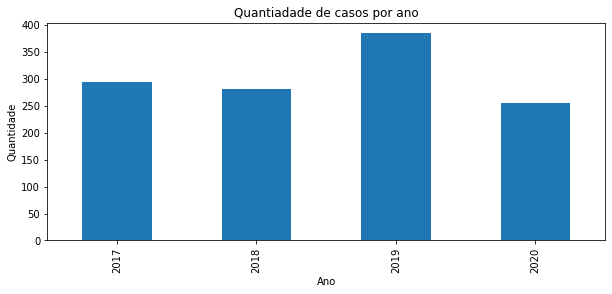

In [ ]:
# GRAFICO DEMONSTRANDO O NÚMERO DE REGISTROS POR ANO
# O MAIOR NÚMERO DE CASOS ACONTECEU EM 2019, PORÉM O ANO DE 2020 NAO ACABOU E EXISTE UM NÚMERO RAZOAVEL PARA CONSIDERARMOS EM 9 MESES 

casos_por_ano.plot(kind='bar', figsize=(10,4))
plt.title('Quantiadade de casos por ano')
plt.ylabel('Quantidade')
plt.xlabel('Ano')
plt.show()

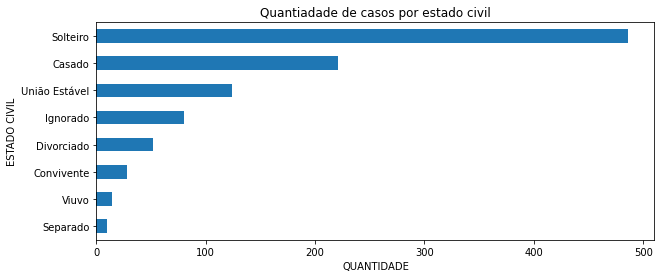

In [ ]:
# GRAFICO DEMONSTRANDO O NÚMERO DE REGISTROS POR UNIÃO

df.groupby('ESTADOCIVIL').size().sort_values().plot(kind='barh', figsize=(10,4))
plt.title('Quantiadade de casos por estado civil')
plt.ylabel('ESTADO CIVIL')
plt.xlabel('QUANTIDADE')
plt.show()

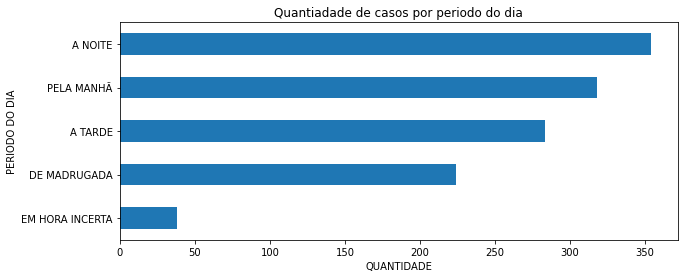

In [ ]:
# GRAFICO DEMONSTRANDO O NÚMERO DE REGISTROS POR PERIODO DO DIA

df.groupby('PERIDOOCORRENCIA').size().sort_values().plot(kind='barh', figsize=(10,4))
plt.title('Quantiadade de casos por periodo do dia')
plt.ylabel('PERIODO DO DIA')
plt.xlabel('QUANTIDADE')
plt.show()

In [ ]:
# GRAFICO DA DISTRIBUIÇÃO DAS IDADES NA BASE DE DADOS
# EXISTE UM NUMERO GRANDE DE B.O REGISTRADOS COM PESSOAS DE 20 ANOS À 40 ANOS 
fig_idades = go.Figure()

fig_idades.add_trace(go.Histogram(x = df['IDADE']))

fig_idades.update_layout(
    title_text = 'Distribuição das idades',
    xaxis_title_text = 'Idade',
    yaxis_title_text = 'Quantidade',
    template = 'plotly_dark',
    bargap = .05,
    width = 750, 
    height = 600
)

fig_idades.show()

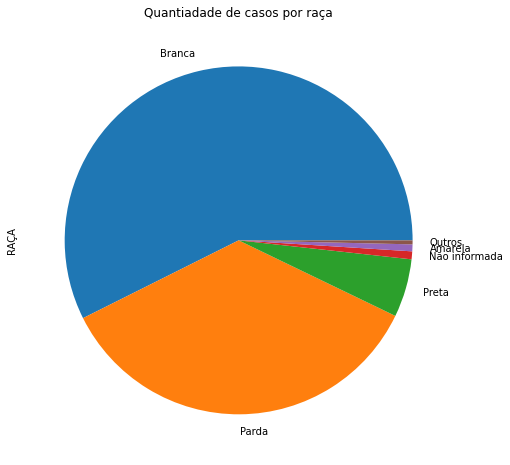

In [ ]:
# GRAFICO DEMONSTRANDO A DISTRIBUIÇÃO DE REGISTROS POR RAÇA NA BASE DE DADOS

df["CORCUTIS"].value_counts().plot.pie(figsize=(10,8))
plt.title('Quantiadade de casos por raça')
plt.ylabel('RAÇA')
plt.show()

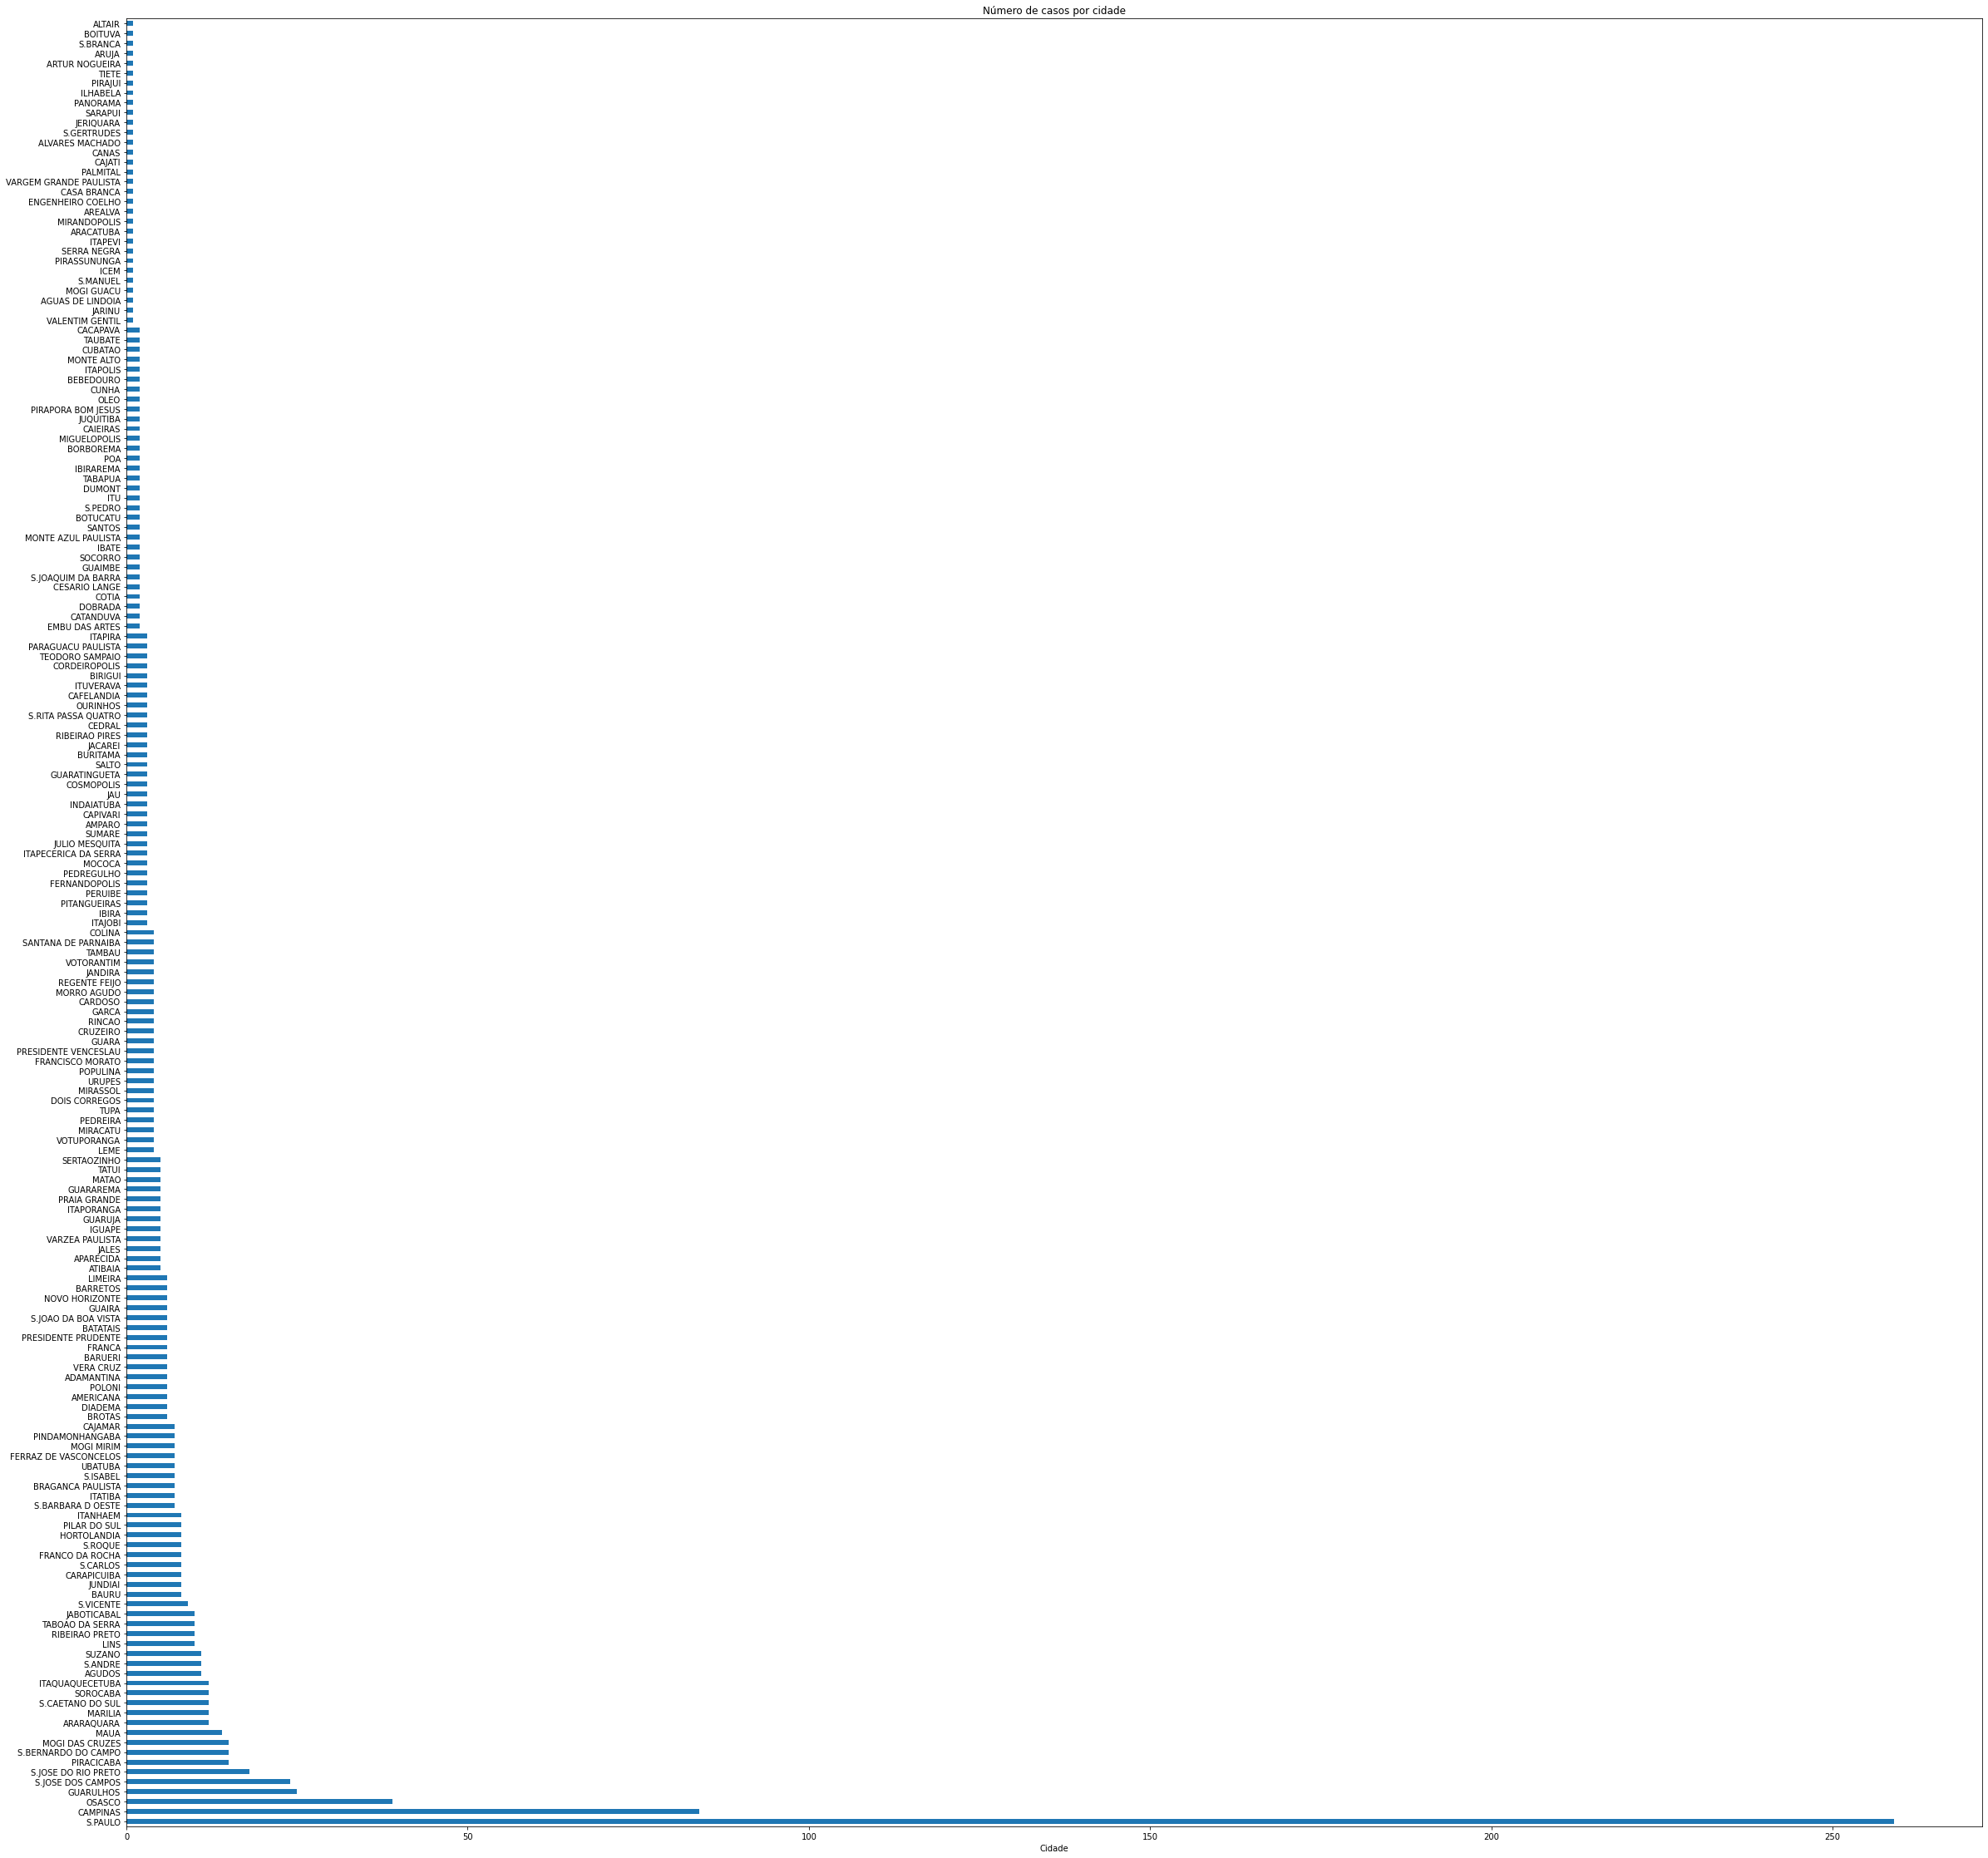

In [ ]:
# GRAFICO DEMONSTRANDO O NÚMERO DE REGISTROS POR CIDADE

propor_cidade_total.plot(kind='barh', figsize=(40,40))
plt.title('Número de casos por cidade')
plt.ylabel('')
plt.xlabel('Cidade')
plt.show()

# **4º ETAPA** - Análises entre tabelas

In [ ]:
# EXIBIR RELAÇÃO ENTRE A HOMICÍDIO QUALIFICADO E O ESTADO CIVIL SOLTEIRO NO PERIODO DO DIA PODEMOS NOTAR QUE A MAIOR PARTE ACONTECE A NOITE

df.query('RUBRICA == \"Homicídio qualificado (art. 121, §2o.)\" and ESTADOCIVIL == \"Solteiro\"').PERIDOOCORRENCIA.value_counts()

A NOITE            110
A TARDE             88
PELA MANHÃ          84
DE MADRUGADA        69
EM HORA INCERTA     11
Name: PERIDOOCORRENCIA, dtype: int64

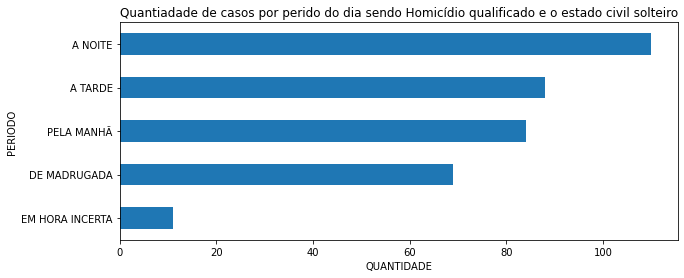

In [ ]:
# GRAFICO RELAÇÃO ENTRE A HOMICÍDIO QUALIFICADO E O ESTADO CIVIL SOLTEIRO NO PERIODO DO DIA PODEMOS NOTAR QUE A MAIOR PARTE ACONTECE A NOITE

df.query('RUBRICA == \"Homicídio qualificado (art. 121, §2o.)\" and ESTADOCIVIL == \"Solteiro\"').PERIDOOCORRENCIA.value_counts().sort_values().plot(kind='barh', figsize=(10,4))
plt.title('Quantiadade de casos por perido do dia sendo Homicídio qualificado e o estado civil solteiro')
plt.ylabel('PERIODO')
plt.xlabel('QUANTIDADE')
plt.show()

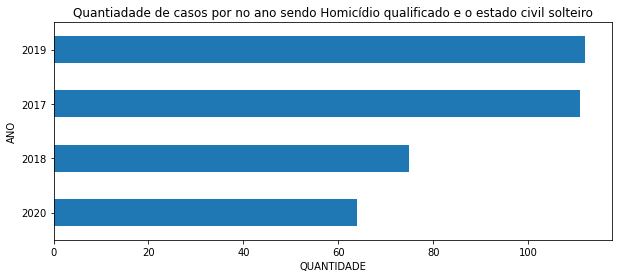

In [ ]:
# GRAFICO RELAÇÃO ENTRE A HOMICÍDIO QUALIFICADO E O ESTADO CIVIL SOLTEIRO NO DECORRER DOS ANOS PODEMOS NOTAR QUE A MAIOR PARTE ACONTECE EM 2019 COM MAIS DE 100 CASOS E NO SEGUNDO LUGAR FICA 2017.

df.query('RUBRICA == \"Homicídio qualificado (art. 121, §2o.)\" and ESTADOCIVIL == \"Solteiro\"').ANO_BO.value_counts().sort_values().plot(kind='barh', figsize=(10,4))
plt.title('Quantiadade de casos por no ano sendo Homicídio qualificado e o estado civil solteiro')
plt.ylabel('ANO')
plt.xlabel('QUANTIDADE')
plt.show()

In [ ]:
# EXIBIR RELAÇÃO ENTRE A HOMICÍDIO QUALIFICADO E OS BAIRROS NA CIDADE DE SÃO PAULO, PODEMOS NOTAR QUE A PARALHEIROS E PIRITUBA LIDERAM O RANKING

df.query('RUBRICA == \"Homicídio qualificado (art. 121, §2o.)\" and CIDADE == \"S.PAULO\"').BAIRRO.value_counts()

PARELHEIROS           8
SAO MATEUS            7
PIRITUBA              7
ITAQUERA              6
VILA MARIA            6
ERMELINO MATARAZZO    6
CAPAO REDONDO         6
JARDIM ANGELA         6
GRAJAU                5
AGUA RASA             5
JARAGUA               4
LAJEADO               4
ITAIM PAULISTA        4
REPUBLICA             4
BRASILANDIA           4
JABAQUARA             4
PERUS                 4
VILA GUILHERME        4
CANGAIBA              3
TREMEMBE              3
PONTE RASA            3
VILA CURUCA           3
VILA MEDEIROS         3
MORUMBI               3
VILA MATILDE          3
JARDIM PAULISTA       3
MANDAQUI              3
PARQUE DO CARMO       3
SAPOPEMBA             3
SACOMA                2
IGUATEMI              2
CIDADE LIDER          2
SAO DOMINGOS          2
IPIRANGA              2
BOM RETIRO            2
JARDIM COLINA         2
CIDADE ADEMAR         2
SAO MIGUEL            2
BARRA FUNDA           2
ARTUR ALVIM           2
RAPOSO TAVARES        2
SANTA CECILIA   

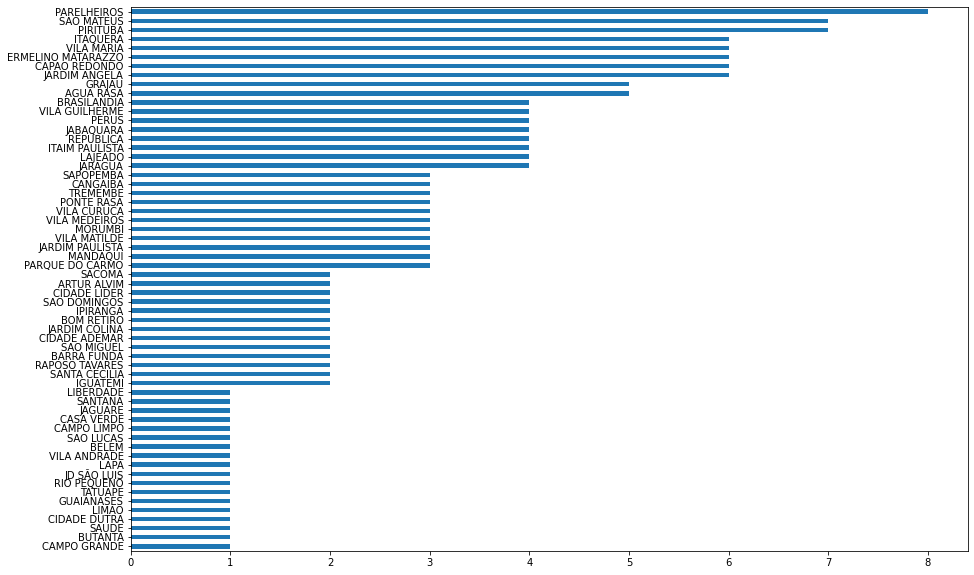

In [ ]:
# GRAFICO RELAÇÃO ENTRE A HOMICÍDIO QUALIFICADO E OS BAIRROS NA CIDADE DE SÃO PAULO, PODEMOS NOTAR QUE QUE PARALHEIROS E PIRITUBA LIDERAM O RANKING.

df.query('RUBRICA == \"Homicídio qualificado (art. 121, §2o.)\" and CIDADE == \"S.PAULO\"').BAIRRO.value_counts().sort_values().plot(kind='barh', figsize=(15,10))

In [ ]:
# EXIBIR RELAÇÃO ENTRE A HOMICÍDIO QUALIFICADO E O ESTADO CIVIL UNIÃO ESTÁVEL NO PERIODO DO DIA PODEMOS NOTAR QUE A MAIOR PARTE ACONTECE A NOITE PORÉM É MENOR QUE QUE COM O ESTADO CIVIL SOLTEIRO.

df.query('RUBRICA == \"Homicídio qualificado (art. 121, §2o.)\" and ESTADOCIVIL == \"União Estável\"').PERIDOOCORRENCIA.value_counts()

A NOITE            42
DE MADRUGADA       20
PELA MANHÃ         19
A TARDE             8
EM HORA INCERTA     4
Name: PERIDOOCORRENCIA, dtype: int64

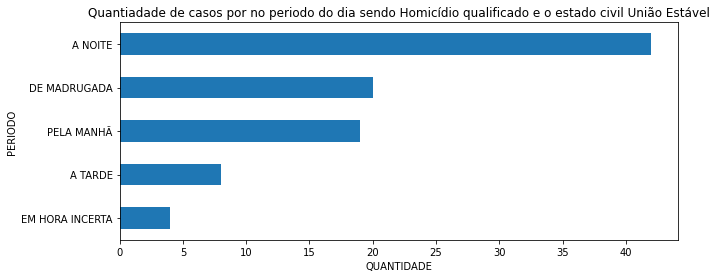

In [ ]:
# GRAFICO RELAÇÃO ENTRE A HOMICÍDIO QUALIFICADO E O ESTADO CIVIL UNIÃO ESTÁVEL NO PERIODO DO DIA PODEMOS NOTAR QUE A MAIOR PARTE ACONTECE A NOITE PORÉM É MENOR QUE QUE COM O ESTADO CIVIL SOLTEIRO.

df.query('RUBRICA == \"Homicídio qualificado (art. 121, §2o.)\" and ESTADOCIVIL == \"União Estável\"').PERIDOOCORRENCIA.value_counts().sort_values().plot(kind='barh', figsize=(10,4))
plt.title('Quantiadade de casos por no periodo do dia sendo Homicídio qualificado e o estado civil União Estável')
plt.ylabel('PERIODO')
plt.xlabel('QUANTIDADE')
plt.show()

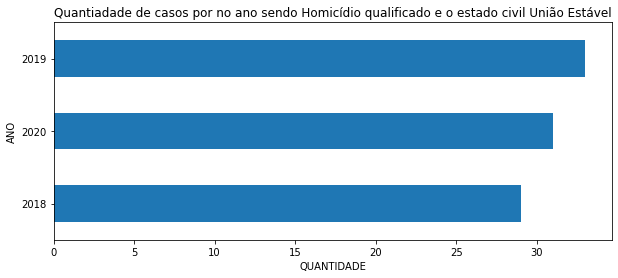

In [ ]:
# GRAFICO RELAÇÃO ENTRE A HOMICÍDIO QUALIFICADO E O ESTADO CIVIL UNIÃO ESTÁVEL NO DECORRER DOS ANOS PODEMOS NOTAR QUE A MAIOR PARTE ACONTECE EM 2019 E EM 2017 NÃO EXISTE REGISTROS.

df.query('RUBRICA == \"Homicídio qualificado (art. 121, §2o.)\" and ESTADOCIVIL == \"União Estável\"').ANO_BO.value_counts().sort_values().plot(kind='barh', figsize=(10,4))
plt.title('Quantiadade de casos por no ano sendo Homicídio qualificado e o estado civil União Estável')
plt.ylabel('ANO')
plt.xlabel('QUANTIDADE')
plt.show()

In [ ]:
# GRAFICO DEMONSTRANDO A RELAÇÃO DE HOMICIDIO QUALIFICADO ENTRE AS IDADES NA BASE DE DADOS
# A MAIOR TAXA DE FEMINICIDIO POR HOMICIDIO QUALIFICADO ACONTECE ENTRE AS IDADES 26 À 35 ANOS

Homicídio_qualificado = df[df['RUBRICA'] == 'Homicídio qualificado (art. 121, §2o.)']
nao_Homicídio_qualificado = df[df['RUBRICA'] != 'Homicídio qualificado (art. 121, §2o.)']

fig_idades = make_subplots(rows = 2,
                           cols = 1,
                           subplot_titles = ("Homicídio Qualificado", 
                                             "Não foi Homicídio Qualificado"))

fig_idades.add_trace(go.Histogram(x = Homicídio_qualificado['IDADE'],
                                  name = 'Homicídio Qualificado',
                                  showlegend = False),
                     row = 1, col = 1)

fig_idades.add_trace(go.Histogram(x = nao_Homicídio_qualificado['IDADE'],
                                  name = 'Não foi Homicídio Qualificado',
                                  showlegend = False),
                     row = 2, col = 1)

fig_idades.update_layout(
    title_text = 'Distribuição das idades',
    template = 'plotly_dark',
    bargap = .05,
    width = 750, 
    height = 600
)

fig_idades.show()

In [ ]:
# QUANTIDADE DE REGISTROS POR IDADE MENOR OU IGUAL A 17 ANOS (RESUMO DE FEMINICIDIO EM MENORES DE IDADE)

menor_idade_cidade = df[df["IDADE"] <= 17]['CIDADE'].value_counts()
menor_idade_cidade

S.PAULO                  7
SOROCABA                 4
ITAQUAQUECETUBA          3
S.CAETANO DO SUL         3
NOVO HORIZONTE           3
PIRACICABA               3
S.ROQUE                  2
CAMPINAS                 2
SUMARE                   2
GARCA                    2
MAUA                     2
LEME                     2
S.JOSE DOS CAMPOS        2
POA                      2
GUARA                    2
S.CARLOS                 1
CRUZEIRO                 1
MOGI DAS CRUZES          1
GUARUJA                  1
FERRAZ DE VASCONCELOS    1
Name: CIDADE, dtype: int64

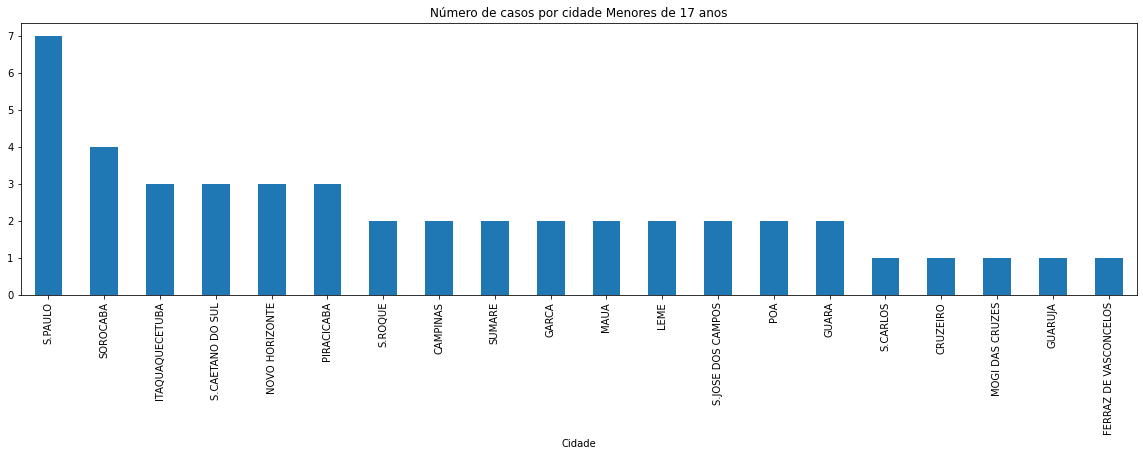

In [ ]:
# GRAFICO DEMONSTRANDO O NUMERO DE CASOS POR CIDADE EM RELAÇÃO AOS MENORES DE IDADE
# PODEMOS NOTAR QUE O MAIOR NUMERO DE OCORRENCIAS COM FEMINICIDIO ACONTECE EM SÃO PAULO EM RELAÇÃO AOS MENORES DE IDADE

menor_idade_cidade.plot(kind='bar', figsize=(20,5))
plt.title('Número de casos por cidade Menores de 17 anos')
plt.ylabel('')
plt.xlabel('Cidade')
plt.show()

In [ ]:
# GRAFICO DEMONSTRANDO A RELAÇÃO DE HOMICIDIO QUALIFICADO ENTRE OS ANOS NA BASE DE DADOS
# PODEMOS NOTAR QUE NO ANO 2019 FOI O ANO COM MAIOR TAXA DE FEMINICIDIO E COM HOMICIDIO QUALIFICADO PASSANDO DOS 250

Homicídio_qualificado = df[df['RUBRICA'] == 'Homicídio qualificado (art. 121, §2o.)']
nao_Homicídio_qualificado = df[df['RUBRICA'] != 'Homicídio qualificado (art. 121, §2o.)']

fig_idades = make_subplots(rows = 2,
                           cols = 1,
                           subplot_titles = ("Homicídio Qualificado", 
                                             "Não foi Homicídio Qualificado"))

fig_idades.add_trace(go.Histogram(x = Homicídio_qualificado['ANO_BO'],
                                  name = 'Homicídio Qualificado',
                                  showlegend = False),
                     row = 1, col = 1)

fig_idades.add_trace(go.Histogram(x = nao_Homicídio_qualificado['ANO_BO'],
                                  name = 'Não foi Homicídio Qualificado',
                                  showlegend = False),
                     row = 2, col = 1)

fig_idades.update_layout(
    title_text = 'Distribuição das idades',
    template = 'plotly_dark',
    bargap = .05,
    width = 750, 
    height = 600
)

fig_idades.show()

# **5º ETAPA** - Outras Análises

Text(0.5, 1.0, 'Boxplot da idade nos anos de Registro')

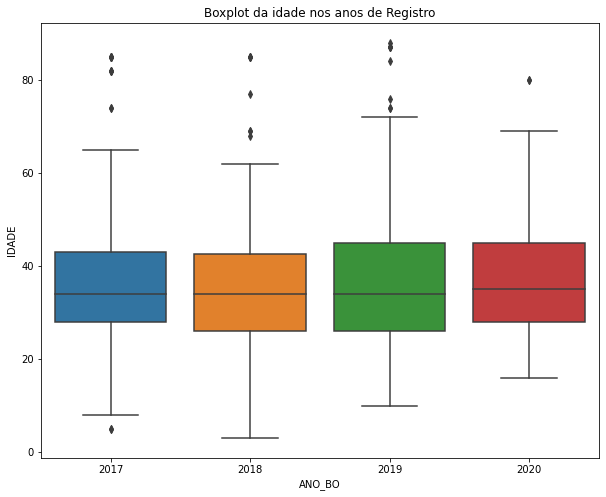

In [ ]:
# GRAFICO BOXPLOT DA RELAÇÃO DA IDADE COM OS ANOS DE B.O, PODEMOS ENTENDER A MEDIA DE IDADE E OS PONTOS FORA DA CURVA

plt.figure(figsize=(10, 8))
sb.boxplot(x="ANO_BO", y = "IDADE", data = df)
plt.title("Boxplot da idade nos anos de Registro")

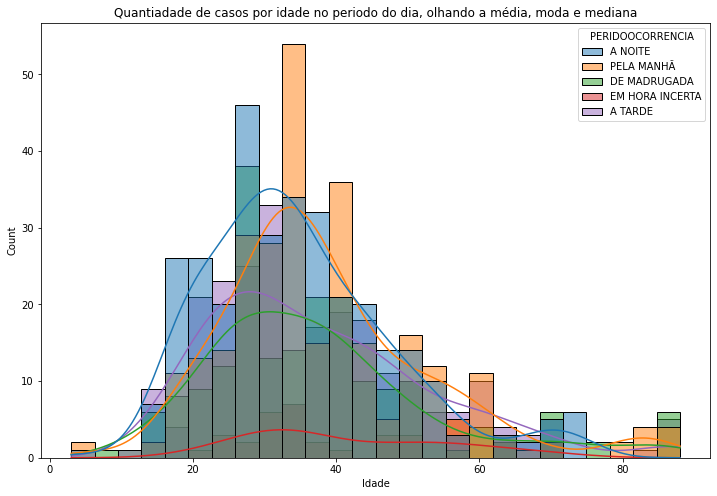

In [ ]:
# GRAFICO COMPARANDO A IDADE COM O PERIDO DA OCORRENCIA ONDE A LINHA MOSTRA DE FORMA SIMPLES A MEDIA, MODA E MEDIANA DE CADA OPÇÃO

plt.figure(figsize=(12,8))
sb.histplot(df, x = "IDADE", hue="PERIDOOCORRENCIA", kde=True)
plt.title('Quantiadade de casos por idade no periodo do dia, olhando a média, moda e mediana')
plt.ylabel('Count')
plt.xlabel('Idade')
plt.show()

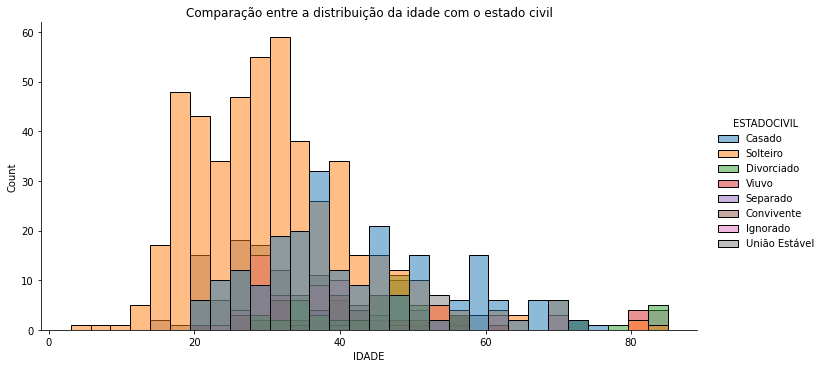

In [ ]:
#  GRAFICO COMPARAÇÃO ENTRE A DISTRIBUIÇÃO DA IDADE POR ESTADO CIVIL

sb.displot(data=df,hue=df.ESTADOCIVIL, x=df.IDADE, kind='hist', aspect=2, bins = 30)
plt.title('Comparação entre a distribuição da idade com o estado civil')
plt.show()

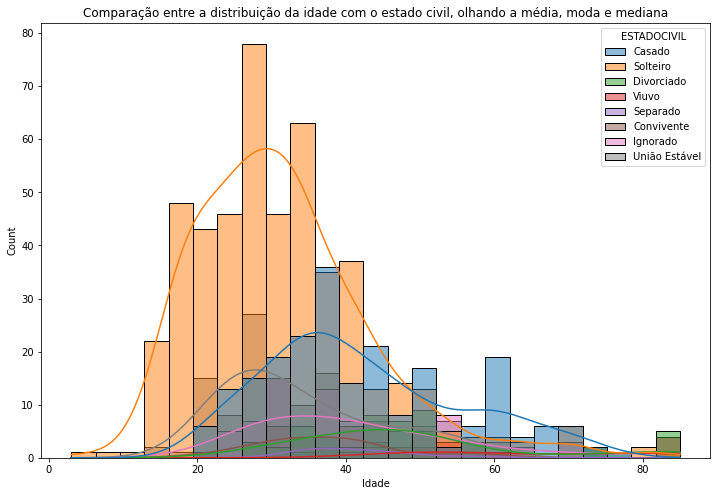

In [ ]:
# GRAFICO COMPARANDO A IDADE COM O ESTADO CIVIL DA PESSOA ONDE A LINHA MOSTRA DE FORMA SIMPLES A MEDIA, MODA E MEDIANA DE CADA OPÇÃO

plt.figure(figsize=(12,8))
sb.histplot(df, x = "IDADE", hue="ESTADOCIVIL", kde=True)
plt.title('Comparação entre a distribuição da idade com o estado civil, olhando a média, moda e mediana')
plt.ylabel('Count')
plt.xlabel('Idade')
plt.show()